In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.1 MB/s eta 0:00:00


In [3]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [4]:
df = pd.read_csv("Merge.csv")
df.head()

Date  Hour  Irradiance  Power  Temp   Hum
0  2021-09-01     0           0    0.0  82.0  84.0
1  2021-09-01     1           0    0.0  82.0  84.0
2  2021-09-01     2           0    0.0  82.0  86.5
3  2021-09-01     3           0    0.0  82.0  89.0
4  2021-09-01     4           0    0.0  84.0  79.0

In [5]:
df.shape

(8736, 6)

In [6]:
df=df.drop(["Hour"],axis=1)

In [7]:
df.head()

Date  Irradiance  Power  Temp   Hum
0  2021-09-01           0    0.0  82.0  84.0
1  2021-09-01           0    0.0  82.0  84.0
2  2021-09-01           0    0.0  82.0  86.5
3  2021-09-01           0    0.0  82.0  89.0
4  2021-09-01           0    0.0  84.0  79.0

In [8]:
df.isna().sum()

Date          0
Irradiance    0
Power         0
Temp          0
Hum           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        8736 non-null   object 
 1   Irradiance  8736 non-null   int64  
 2   Power       8736 non-null   float64
 3   Temp        8736 non-null   float64
 4   Hum         8736 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 341.4+ KB


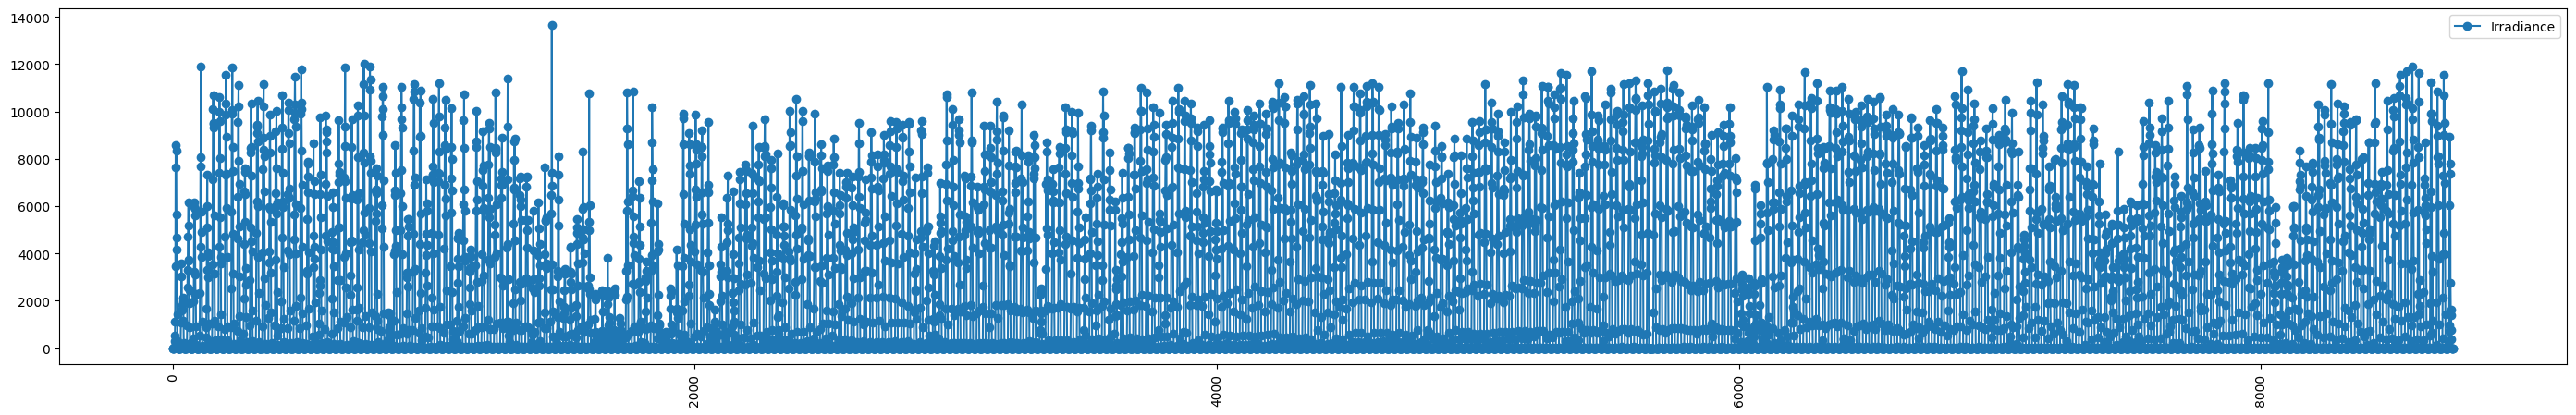

In [10]:
# Ploting the curve 
plt.figure(figsize=(35,5))
#plt.grid()
plt.plot(df['Irradiance'], marker='o', label='Irradiance')
plt.xticks(rotation=90)
plt.legend()
plt.show()

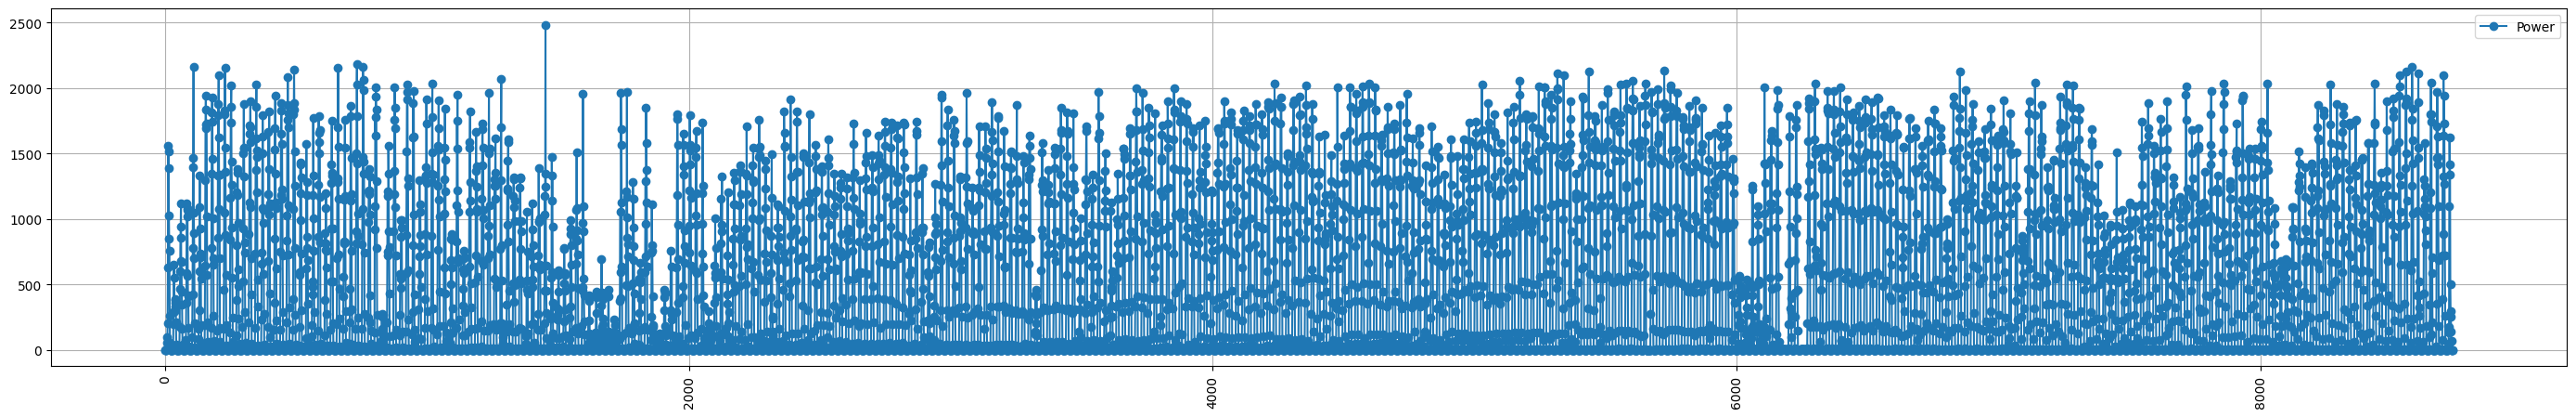

In [11]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(df['Power'], marker='o', label='Power')
plt.xticks(rotation=90)
plt.legend()
plt.show()

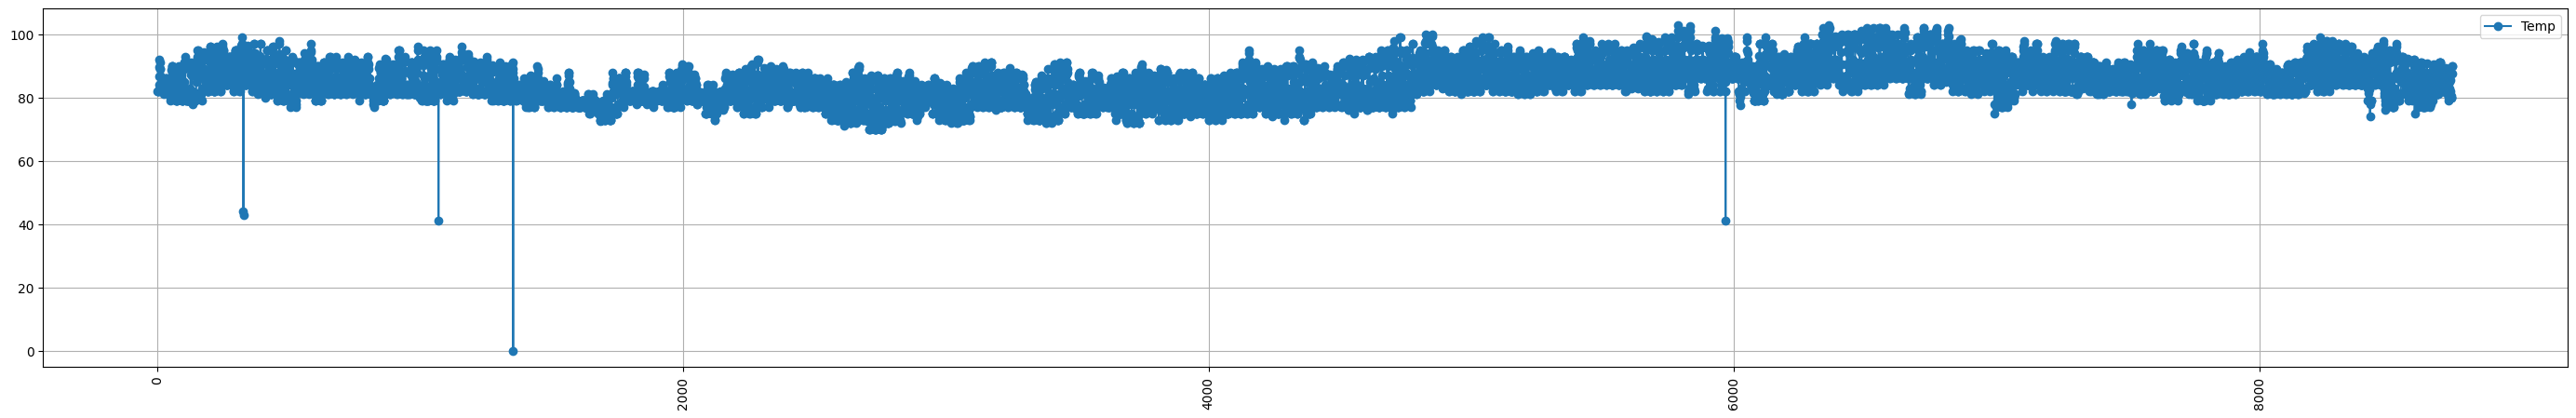

In [12]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(df['Temp'], marker='o', label='Temp')
plt.xticks(rotation=90)
plt.legend()
plt.show()

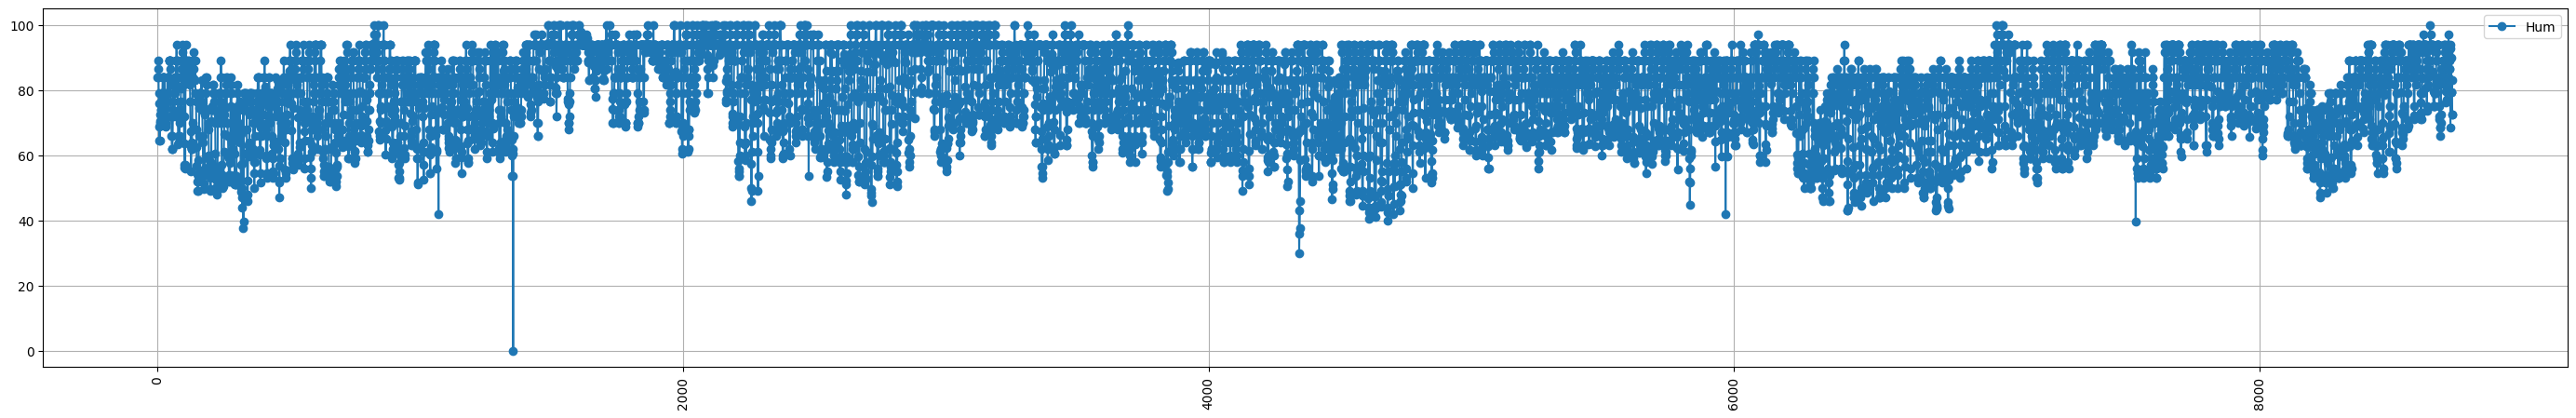

In [13]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(df['Hum'], marker='o', label='Hum')
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Conclusion**
* We can see the seasonality and it seems like it is repeating over a period

**Seasonal Decomposition**

In [15]:
ts_decomposition = seasonal_decompose(x=df['Power'], model='additive', period=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid


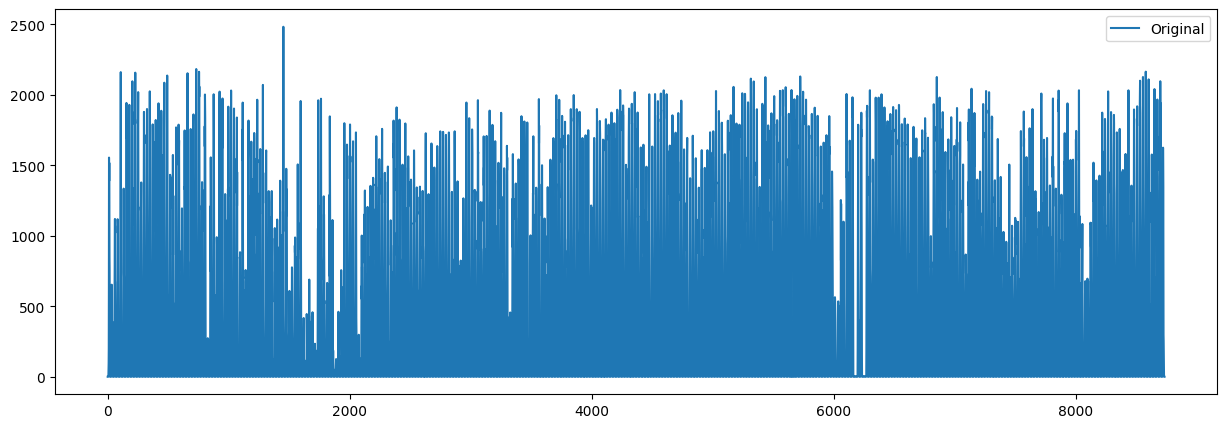

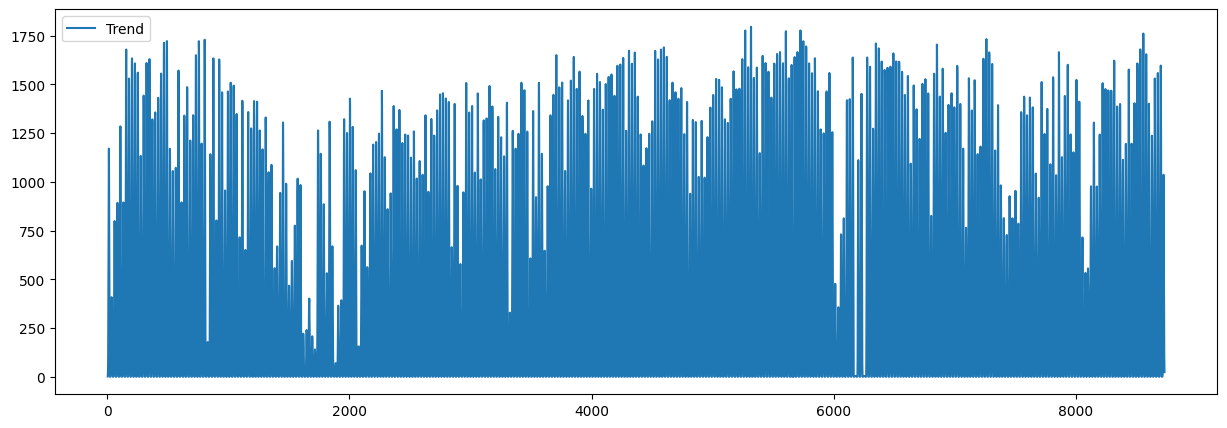

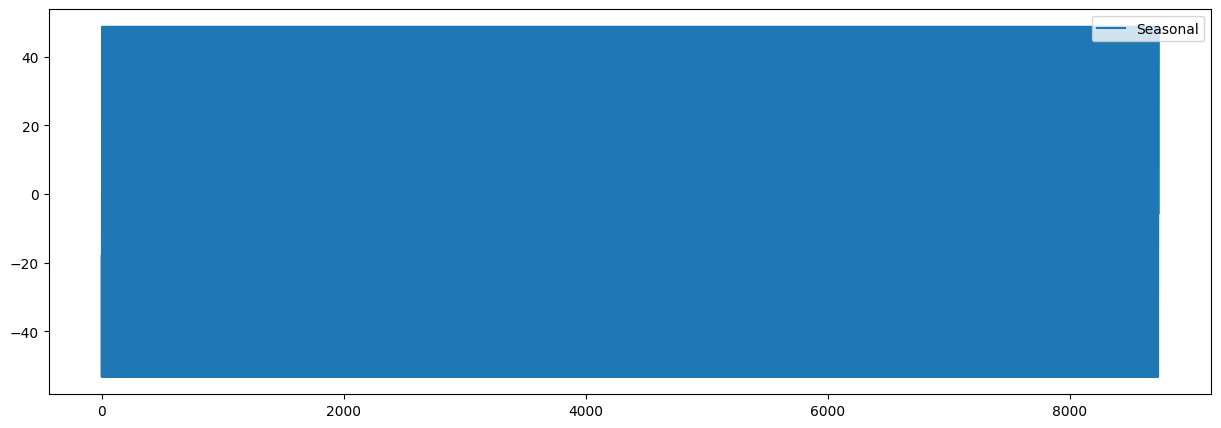

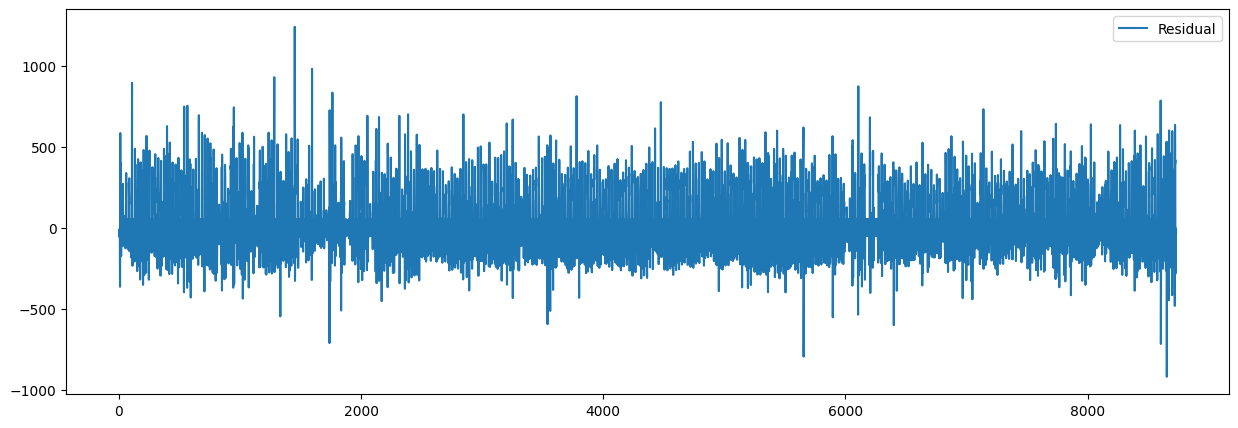

In [16]:
plt.figure(figsize=(15,5))
plt.plot(df['Power'], label='Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

**Rolling Mean and Standard Deviation**

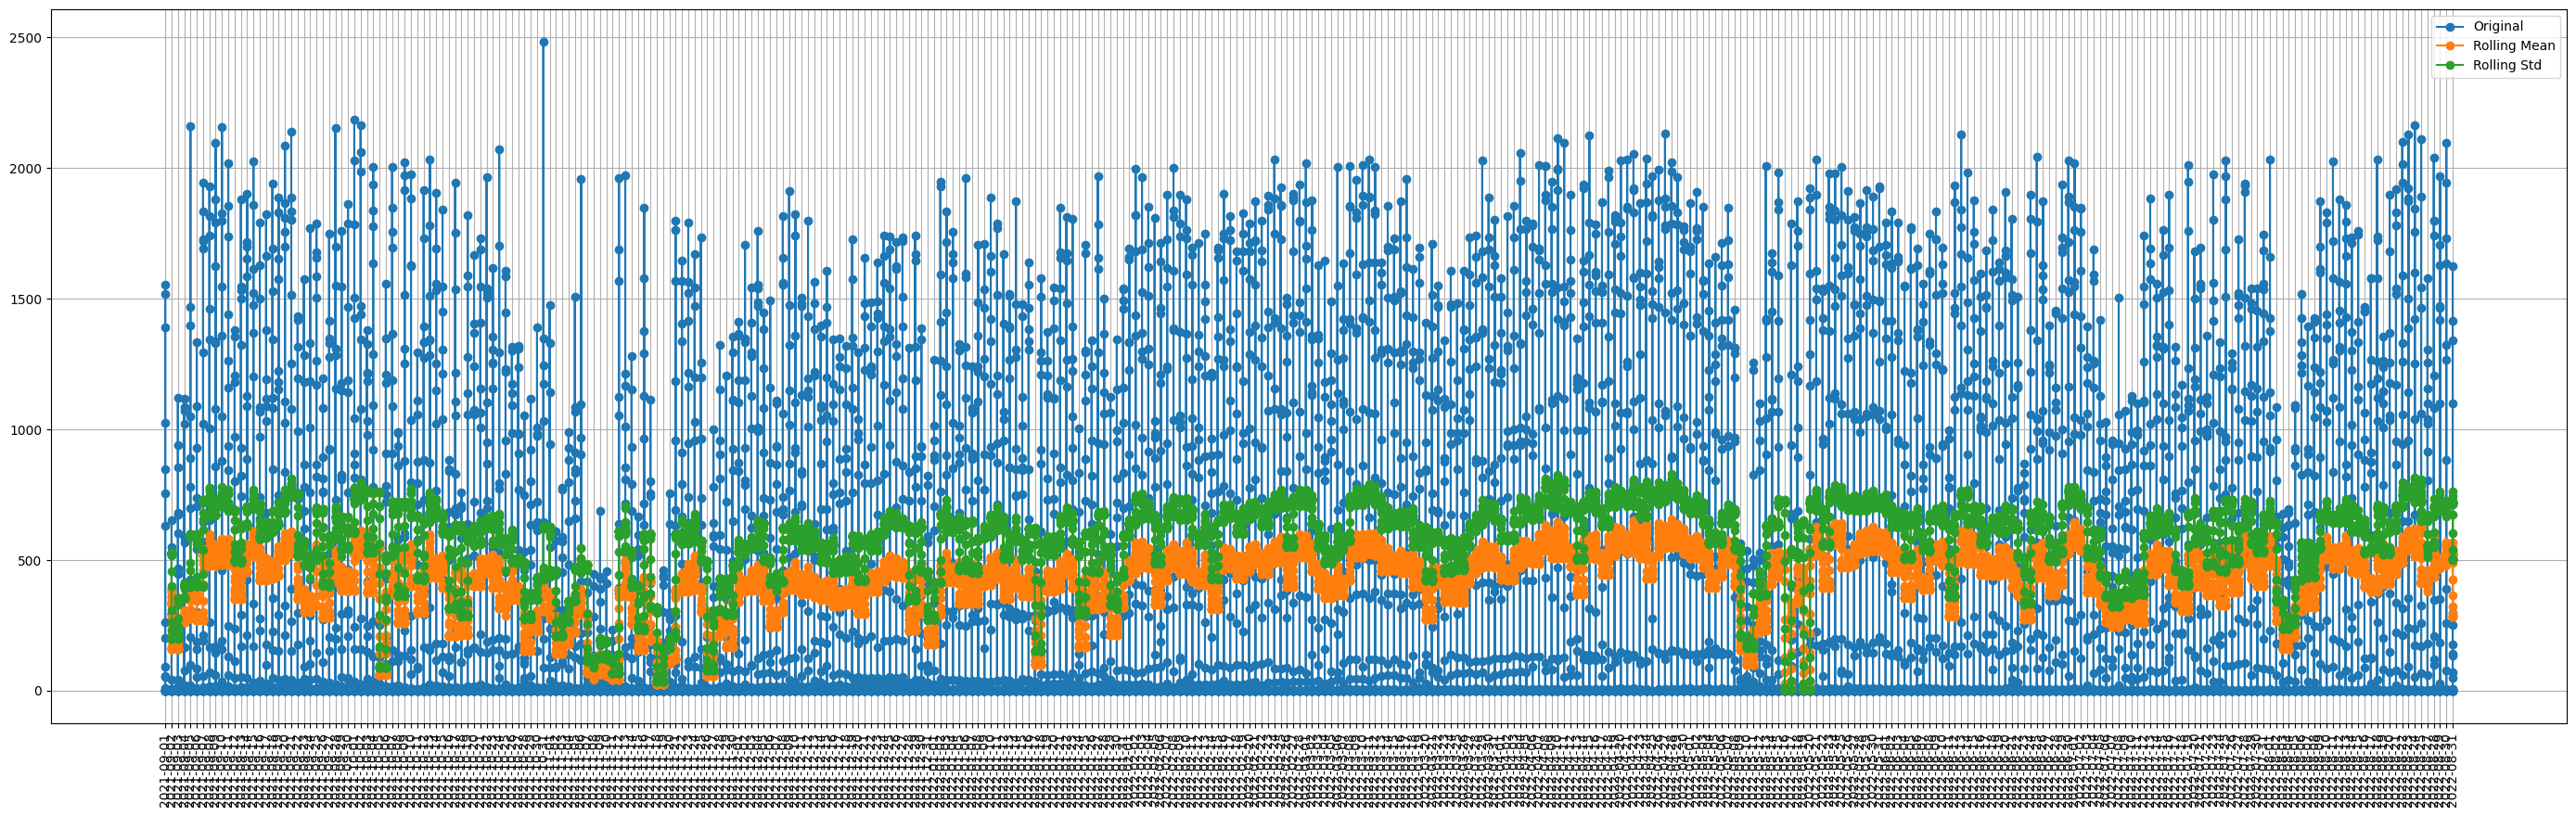

In [17]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(df['Date'], df['Power'], marker='o', label='Original')
plt.plot(df['Date'], df['Power'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(df['Date'], df['Power'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Conclusion**
* We can see that Mean is not constant. 
* Standard deviation is also not constant. 
* It is non-stationary data. 
* We'll plot for other features as well

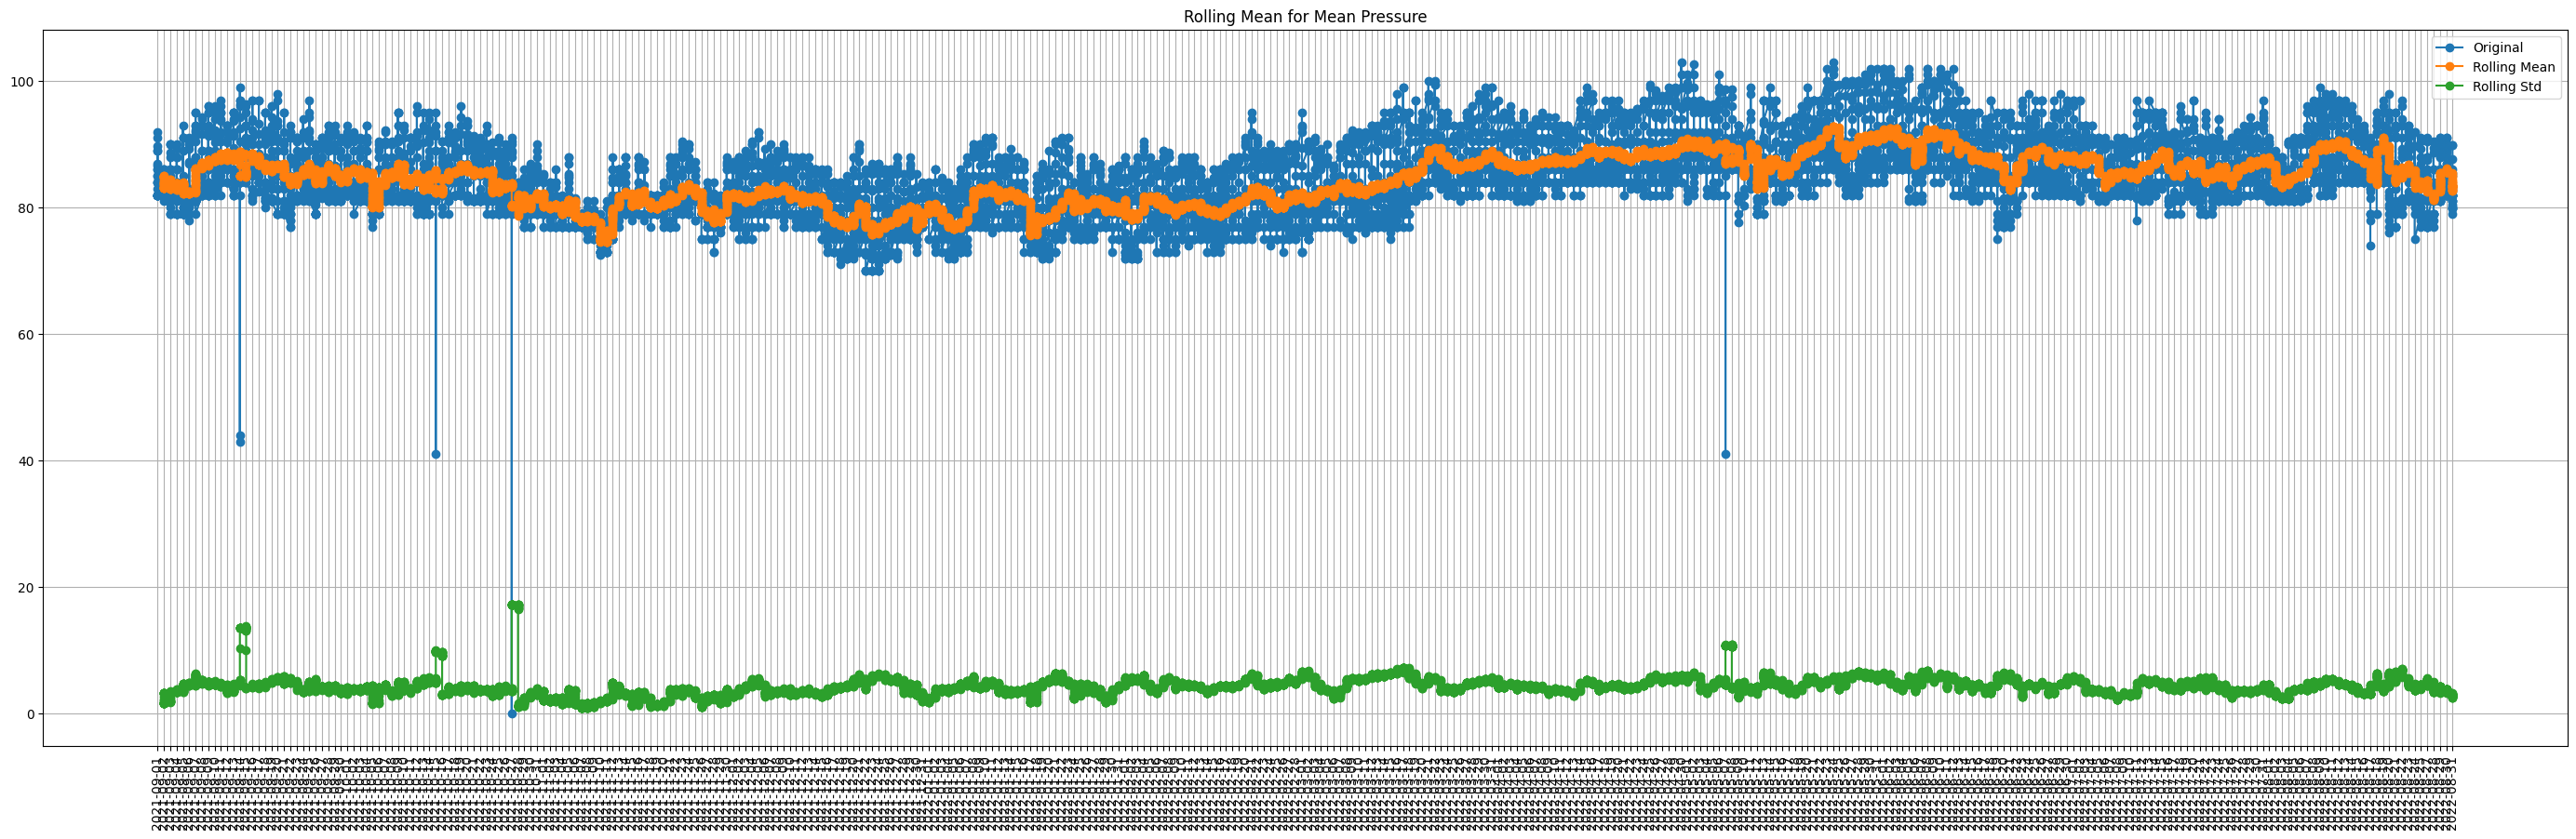

In [18]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(df['Date'], df['Temp'], marker='o', label='Original')
plt.plot(df['Date'], df['Temp'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(df['Date'], df['Temp'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Pressure")
plt.legend()
plt.show()

**Conclusion**
* It is constant.
* To check for stationarity we have to perform the adf test

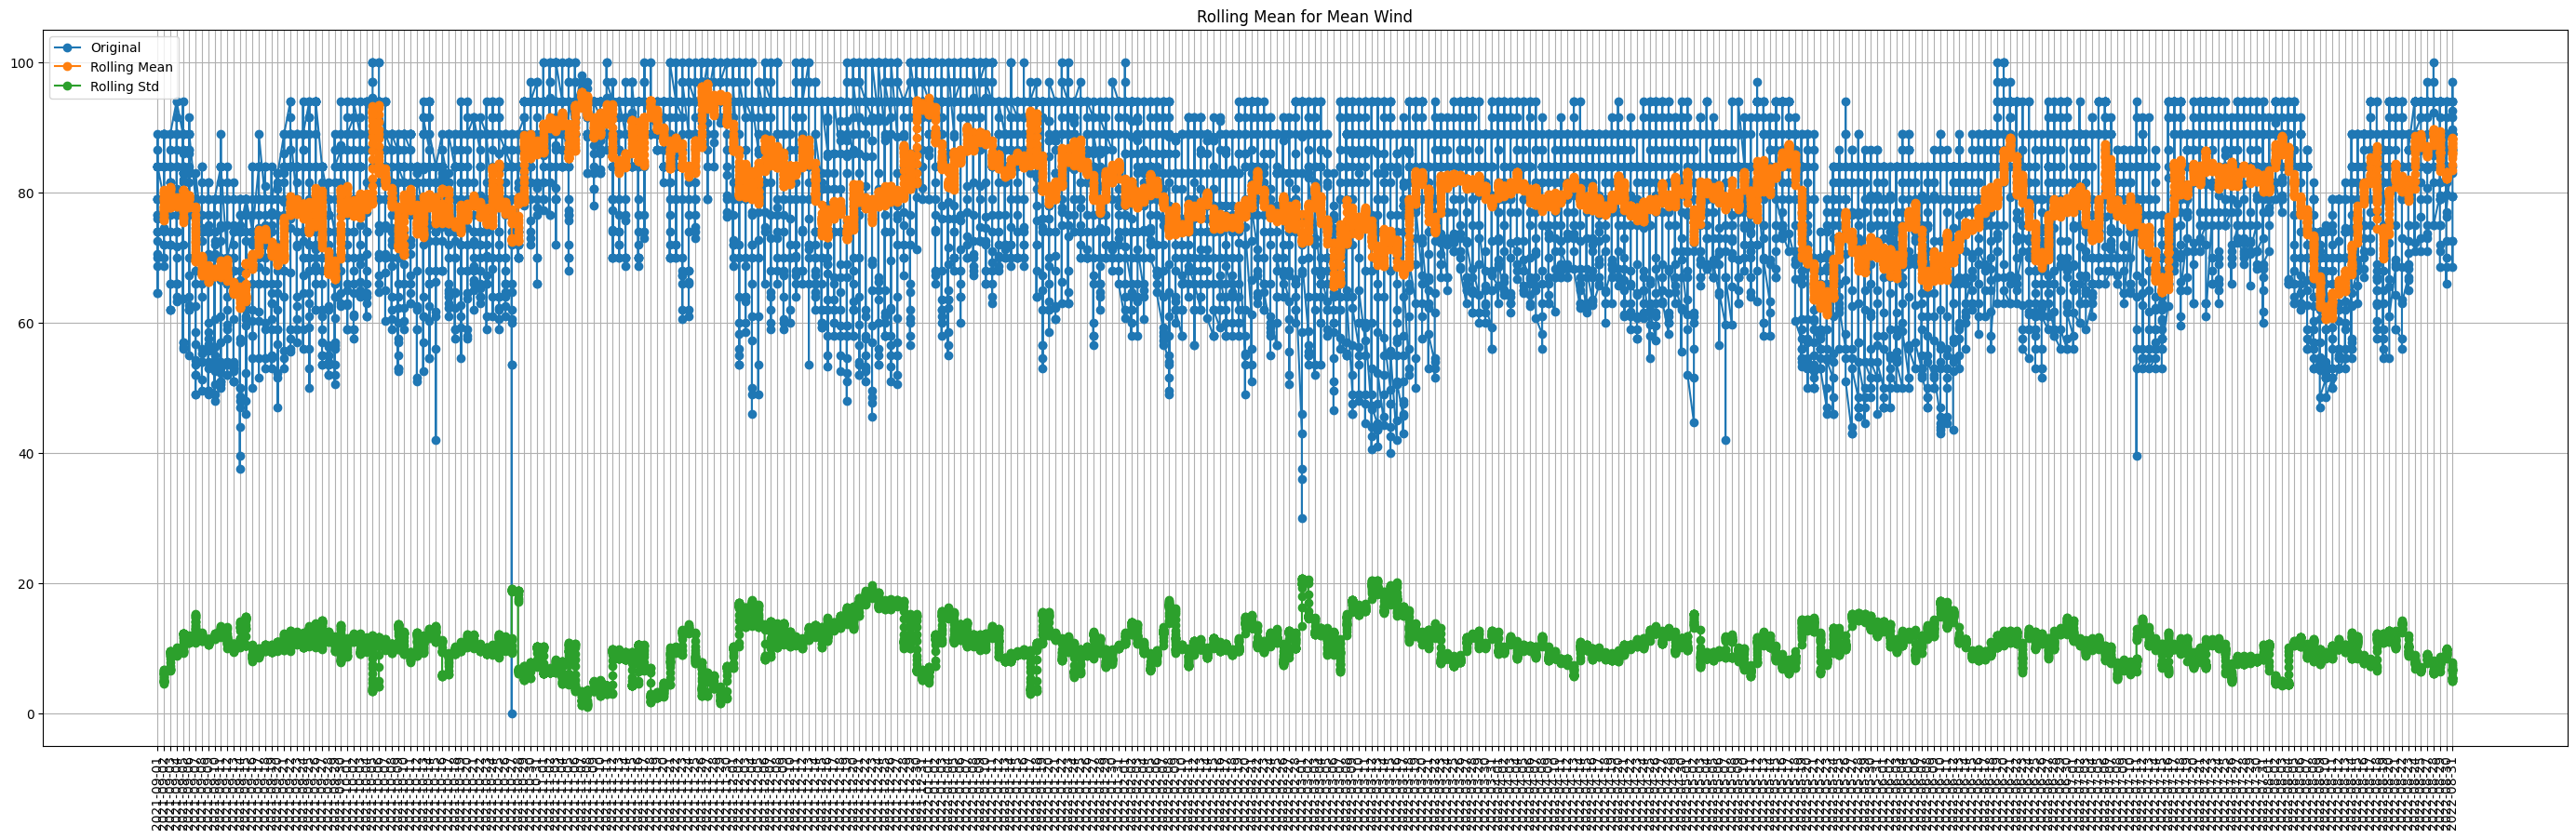

In [19]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(df['Date'], df['Hum'], marker='o', label='Original')
plt.plot(df['Date'], df['Hum'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(df['Date'], df['Hum'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Wind")
plt.legend()
plt.show()

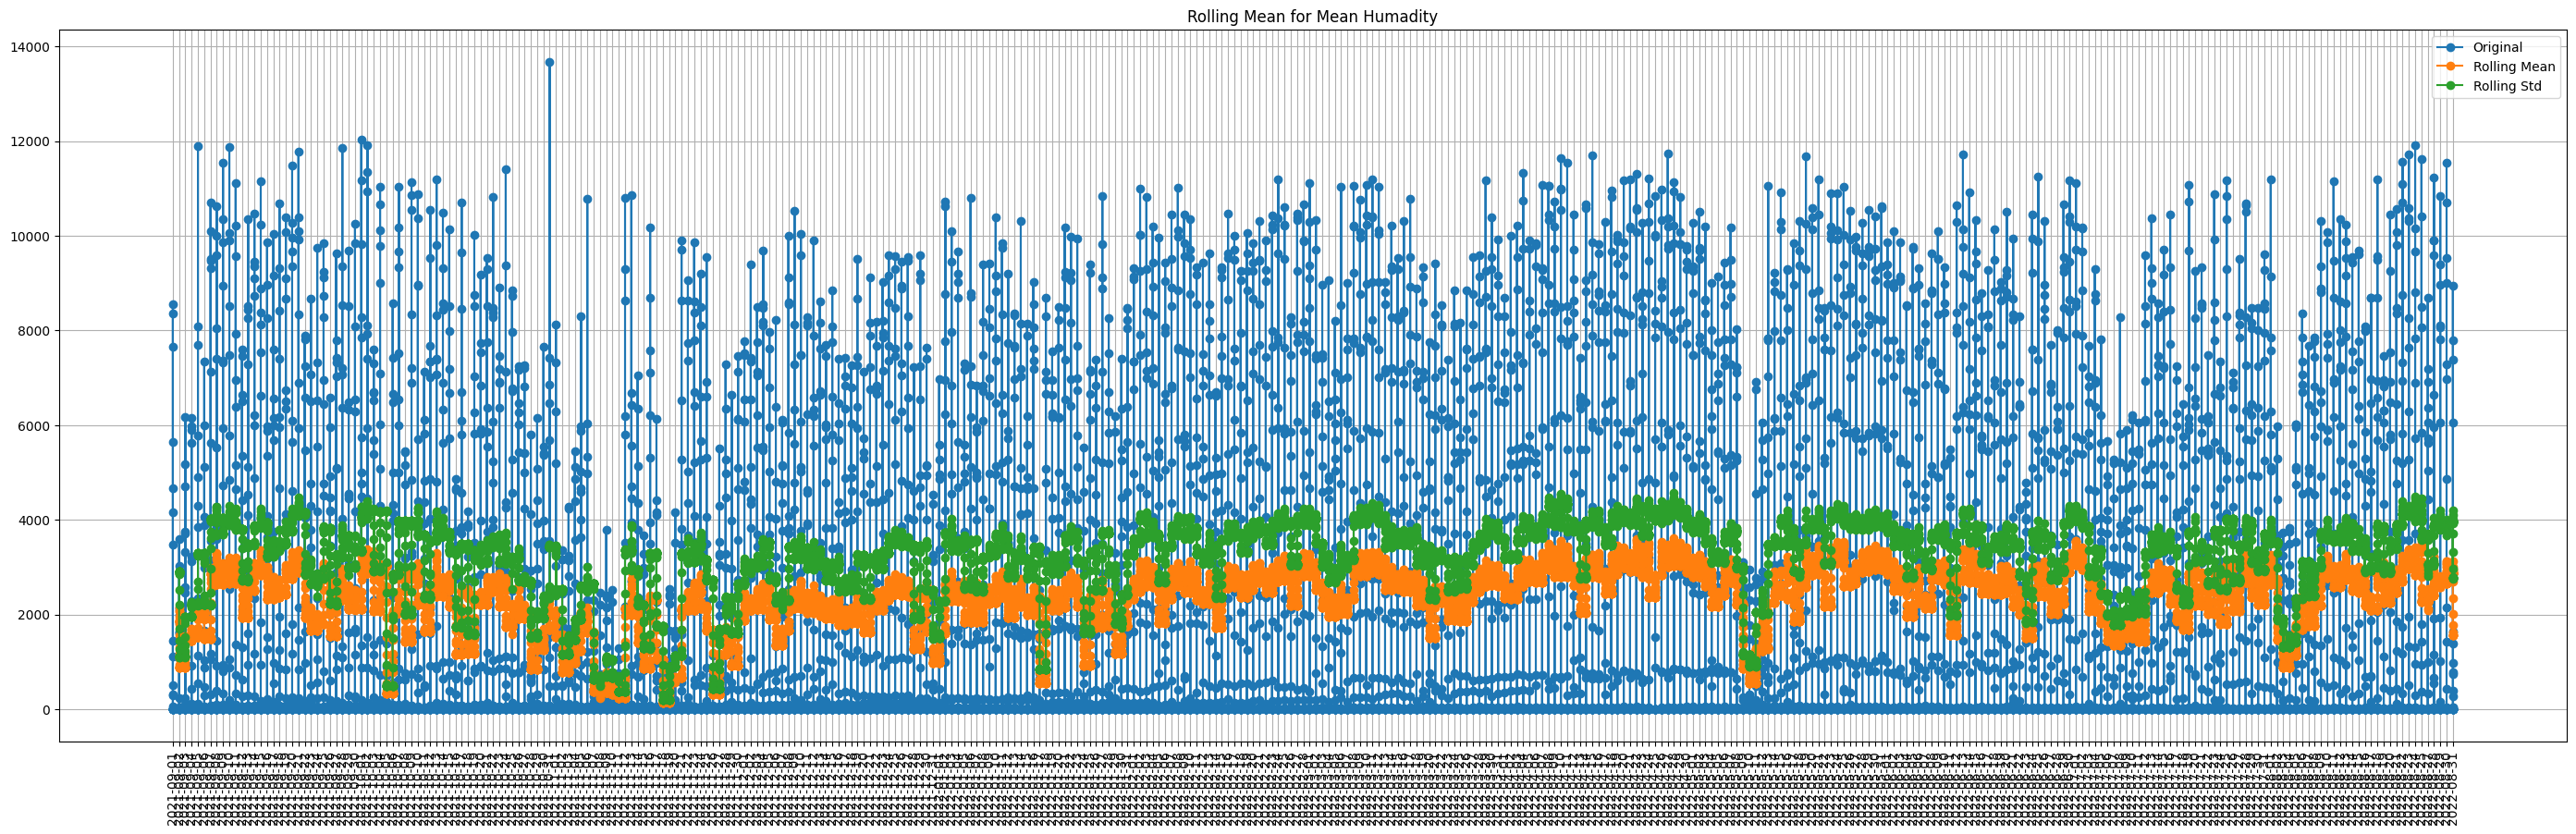

In [20]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(df['Date'], df['Irradiance'], marker='o', label='Original')
plt.plot(df['Date'], df['Irradiance'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(df['Date'], df['Irradiance'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Humadity")
plt.legend()
plt.show()

**Stationary Check**

In [21]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [22]:
# ADF Test on each column
for name, column in df.drop(columns='Date').iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Irradiance" 
    -----------------------------------------------
ADF Statistic: -9.459447
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "Power" 
    -----------------------------------------------
ADF Statistic: -10.218961
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "Temp" 
    -----------------------------------------------
ADF Statistic: -3.832604
p-value: 0.002591
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "Hum" 
    -----------------------------------------------
ADF Statistic: -6.209041
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary




In [23]:
# # ADF Test on each column
# for name, column in train.drop(columns='date').diff().dropna().iteritems():
#     check_stationarity(column, name=column.name)
#     print('\n')

**Conclusion**
* As we can see that features were stationary except Temprature.
* Single differencing makes the Temparature stationary.

**Train-Test-Split**

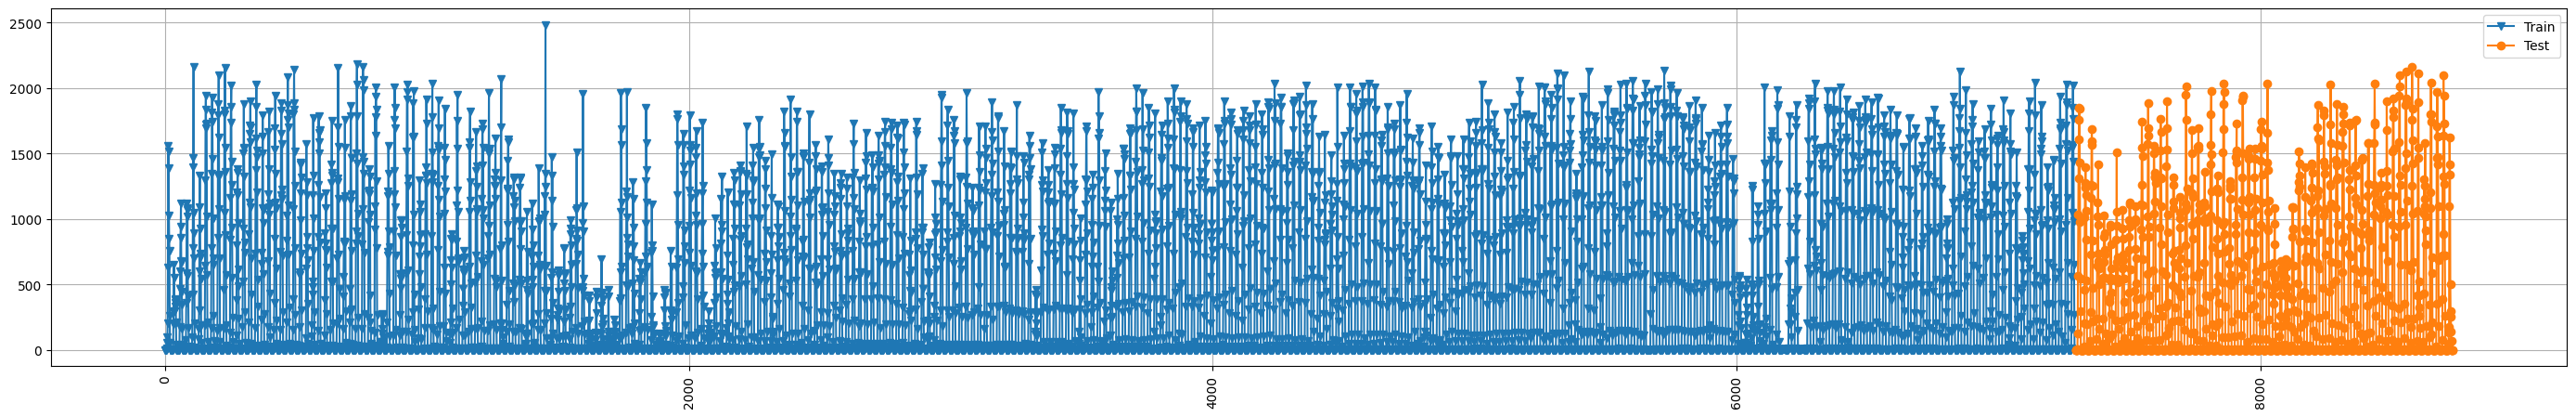

In [24]:
train=df[:-1440]
test=df[-1440:]

plt.figure(figsize=(35,5))
plt.grid()
plt.plot(train['Power'], marker='v', label='Train')
plt.plot( test['Power'], marker='o', label='Test')
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Model-Fitting & Model Evaluation**
* We'll fit Auto-ARIMA with this dataset. 
* And will compare the result with test part inorder to compare it.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=66604.068, Time=131.02 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=81839.549, Time=2.07 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=68079.110, Time=27.38 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=71254.907, Time=40.98 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=81838.090, Time=5.37 sec
 ARIMA(2,0,2)(0,0,1)[4] intercept   : AIC=66616.139, Time=134.29 sec
 ARIMA(2,0,2)(1,0,0)[4] intercept   : AIC=66705.560, Time=146.78 sec
 ARIMA(2,0,2)(2,0,1)[4] intercept   : AIC=66599.829, Time=116.74 sec
 ARIMA(2,0,2)(2,0,0)[4] intercept   : AIC=66635.047, Time=350.47 sec
 ARIMA(2,0,2)(2,0,2)[4] intercept   : AIC=66601.012, Time=411.49 sec
 ARIMA(2,0,2)(1,0,2)[4] intercept   : AIC=66616.205, Time=433.08 sec
 ARIMA(1,0,2)(2,0,1)[4] intercept   : AIC=66695.114, Time=212.81 sec
 ARIMA(2,0,1)(2,0,1)[4] intercept   : AIC=66662.869, Time=249.34 sec
 ARIMA(3,0,2)(2,0,1)[4] intercept   : AIC=66579.984, Time=100.05 s

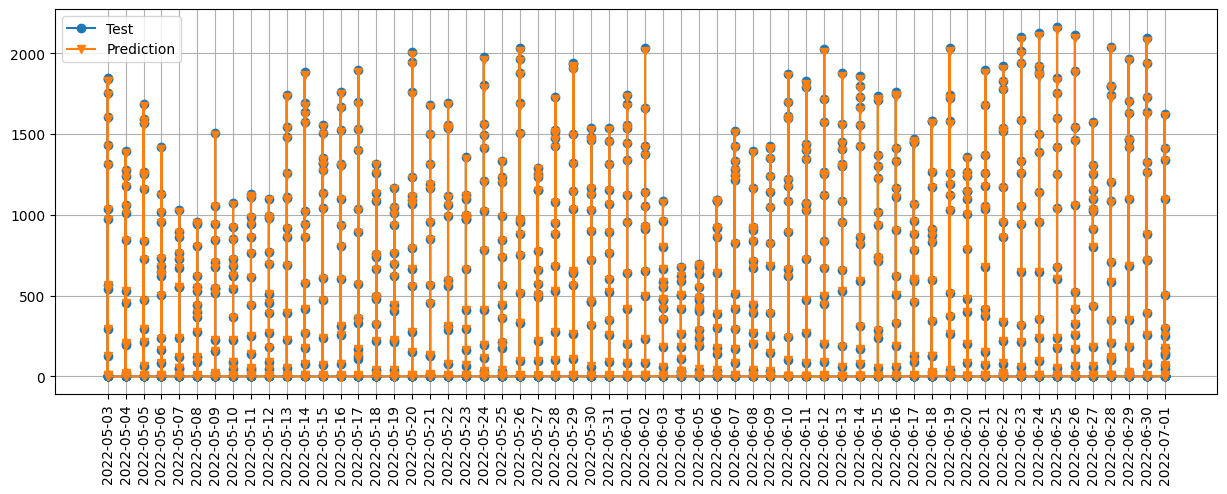

Mean Absolute Percentage Error 1456192125083754.2
Mean Squared Error 36.54191317056465
RMSE 6.044990750246409
AIC values 66464.05911044299


Test  Prediction  Difference  % Chnage
0      0.0    0.942738   -0.942738       inf
1      0.0    1.280802   -1.280802       inf
2      0.0    1.997370   -1.997370       inf
3      0.0    1.372906   -1.372906       inf
4      0.0    1.149987   -1.149987       inf
...    ...         ...         ...       ...
1435   0.0    1.389860   -1.389860       inf
1436   0.0    1.389860   -1.389860       inf
1437   0.0    1.277043   -1.277043       inf
1438   0.0    0.551088   -0.551088       inf
1439   0.0    0.551088   -0.551088       inf

[1440 rows x 4 columns]

In [25]:




# Model Evaluation 

# Fit a simple auto_arima model
arima = pm.auto_arima(train['Power'],X=train.drop(columns=['Date','Power']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=True,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)



pred=arima.predict(n_periods=1440, X=test.drop(columns=['Date','Power']), alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(train['Date'][-1440:],test['Power'], marker='o', label='Test')
plt.plot(train['Date'][-1440:],pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(test['Power'], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['Power'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)


a=pd.DataFrame(test['Power'])
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(pred)
prediction=prediction.reset_index()
prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['Test']=a['Power']
output['Prediction']=prediction[0]
output['Difference']=output['Test']-output['Prediction']
output['% Chnage']=abs(output['Difference']/output['Test'])*100
output


**Conclusion**
* As we can see that Auto-ARIMA woks very well. 
* We have reduced MAPE to **0.035**.
* Wait for the updated notewoork